In [21]:
import numpy as np
import matplotlib.pyplot as plt

# 최적화 함수 (Optimizer)
## 간단한 SGD

In [22]:
data_sample = np.random.uniform(-2,2, size=10)

def loss(x):
    return x**2

def gradient(x):
    return 2*x


In [23]:
def sgd(lr=0.1, epochs = 10):
    w = np.random.uniform(-2,2)
    history = [w]

    for _ in range(epochs):
        sample = np.random.choice(data_sample) # 데이터 샘플 중 하나만 정해서 가중치를 갱신한다.
        grad = gradient(sample)
        w -= lr * grad
        history.append(w)
    
    return history

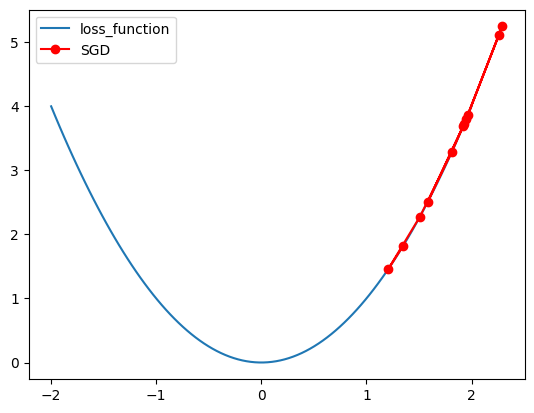

In [24]:
history = sgd()
x_vals = np.linspace(-2,2,100)
plt.plot(x_vals,loss(x_vals), label='loss_function')
plt.plot(history,loss(np.array(history)), 'ro-', label='SGD')
plt.legend()
plt.show()

### 모멘텀 추가

In [25]:
def sgd_momentum(lr=0.1, momentum=0.9, epochs=10):
    w = np.random.uniform(-2,2)
    v = 0
    history = [w]   #기록용 연산과 무관
    
    for _ in range(epochs):
        grad = gradient(w)
        v = momentum*v - lr*grad
        w +=v

        history.append(grad)
        
    return history

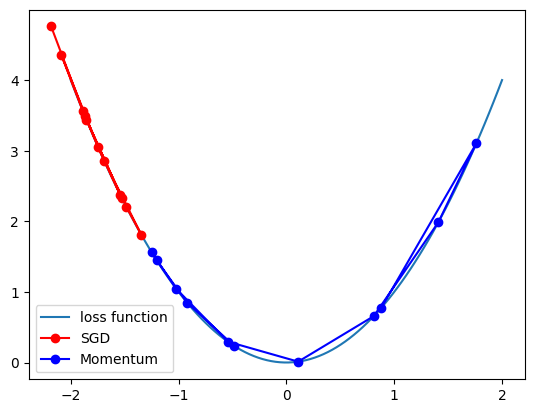

In [26]:
sgd_history = sgd()
momentum_history = sgd_momentum()

x_vals = np.linspace(-2,2,100)
plt.plot(x_vals,loss(x_vals), label='loss function')
plt.plot(sgd_history, loss(np.array(sgd_history)), 'ro-', label='SGD' )
plt.plot(momentum_history, loss(np.array(momentum_history)), 'bo-', label='Momentum')
plt.legend()
plt.show()

### 학습률에 따른 SGD

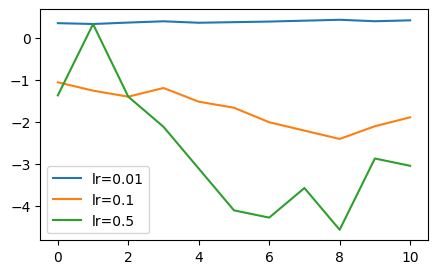

In [27]:
learning_rates = [0.01, 0.1, 0.5]
histories = [sgd(lr=lr) for lr in learning_rates]

plt.figure(figsize=(5, 3))
for i, history in enumerate(histories):
    plt.plot(history, label=f'lr={learning_rates[i]}')
plt.legend()
plt.show()

### AdaGrad

In [28]:
def adagrad(lr=0.1, epsilon=1e-8, epochs=10):
    w = np.random.uniform(-2,2)
    h = 0
    history=[w]

    for _ in range(epochs):
        grad = gradient(w)
        h += grad ** 2
        w -= (lr / (np.sqrt(h) + epsilon)) * grad
        history.append(w)
        
    return history

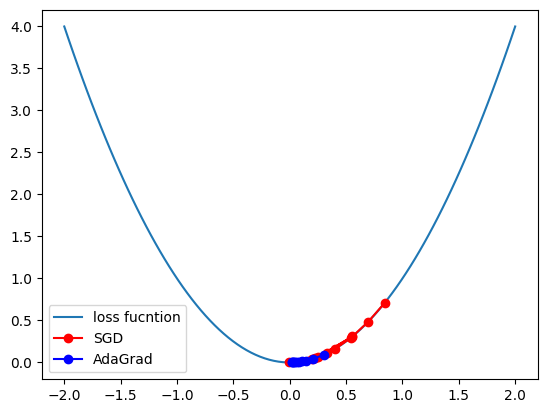

In [29]:
sgd_history = sgd()
adagrad_history = adagrad()

x_vals = np.linspace(-2,2,100)
plt.plot(x_vals, loss(x_vals), label = "loss fucntion")
plt.plot(sgd_history, loss(np.array(sgd_history)), 'ro-', label='SGD')
plt.plot(adagrad_history, loss(np.array(adagrad_history)), 'bo-', label='AdaGrad')
plt.legend()
plt.show()

### RMSprop

In [30]:
def rmsprop(lr=0.1, beta=0.9, epsilon=1e-8, epochs=10):
    w = np.random.uniform(-2,2)
    h = 0
    history = [w]
    
    for _ in range(epochs):
        grad = gradient(w)
        h = beta*h + (1-beta) * grad**2
        w -= (lr / (np.sqrt(h) + epsilon)) * grad
        history.append(w)
        
    return history

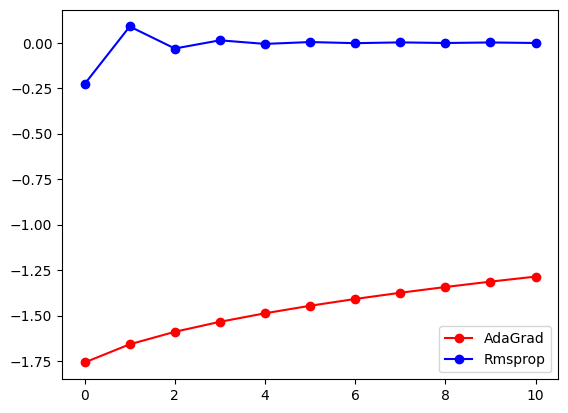

In [31]:
adagrad_history = adagrad()
rmsprop_history = rmsprop()

plt.plot(range(11), adagrad_history, 'ro-', label='AdaGrad')
plt.plot(range(11), rmsprop_history, 'bo-', label='Rmsprop')
plt.legend()
plt.show()

### Adam

In [32]:
def adam(lr=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8, epochs=10):
    w = np.random.uniform(-2,2)
    m, v = 0,0
    history = [w]

    for t in range(1, epochs+1):
        grad = gradient(w)

        m = beta1 * m + (1-beta1)*grad
        v = beta2 * v +  (1-beta2)* grad ** 2
        m_hat = m / (1-beta1 **t) # 편향 보정
        v_hat = v / (1-beta2 **t)
        w -= (lr / (np.sqrt(v_hat) + epsilon)) * m_hat
        history.append(w)
        
    return history

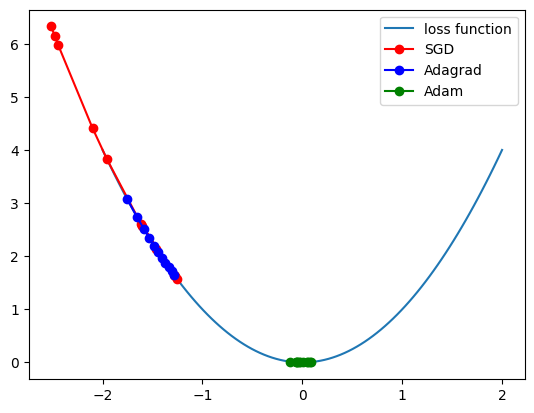

In [33]:
sgd_history = sgd()
adagrad_history = adagrad()
adam_history = adam()

x_vals = np.linspace(-2,2,100)
plt.plot(x_vals, loss(x_vals), label='loss function')

plt.plot(sgd_history, loss(np.array(sgd_history)), 'ro-', label='SGD')
plt.plot(adagrad_history, loss(np.array(adagrad_history)), 'bo-', label='Adagrad')
plt.plot(adam_history, loss(np.array(adam_history)), 'go-', label='Adam')
plt.legend()
plt.show()

### PyTorch 활용 -> SGD vs Adam 비교

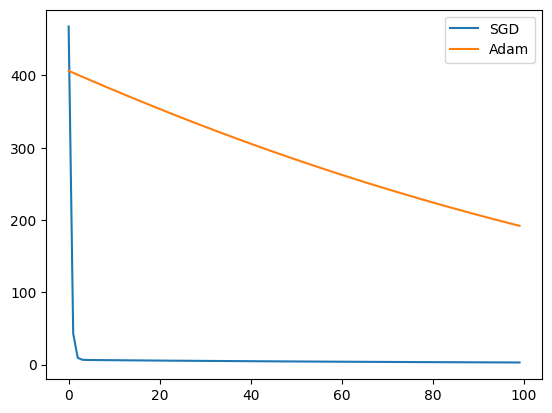

In [34]:
import torch
import torch.nn as nn
import torch.optim as optim

torch.manual_seed(42)
X = torch.rand(100,1) * 10
y = 3 * X + 5 + torch.randn(100,1)


model_sgd = nn.Linear(1,1)
model_adam = nn.Linear(1,1)

criterion = nn.MSELoss()
optim_sgd = optim.SGD(model_sgd.parameters(), lr=0.01)
optim_adam = optim.Adam(model_adam.parameters(), lr=0.01)


epochs = 100
losses_sgd = []
losses_adam = []

for epoch in range(epochs):
    optim_sgd.zero_grad()
    outputs = model_sgd(X)
    loss = criterion(outputs,y)
    loss.backward()
    optim_sgd.step()
    losses_sgd.append(loss.item())

for epoch in range(epochs):
    optim_adam.zero_grad()
    outputs = model_adam(X)
    loss = criterion(outputs,y)
    loss.backward()
    optim_adam.step()
    losses_adam.append(loss.item())
    
plt.plot(losses_sgd, label='SGD')
plt.plot(losses_adam, label='Adam')
plt.legend()
plt.show()

In [35]:
# 1. 활성화 함수 및 손실 함수 정의
def relu(x):
     return np.maximum(0,x)
 
def relu_d(x):
    return (x>0).astype(float)
 
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x/ np.sum(exp_x)

def cross_entropy_loss(y_true,y_pred):
    return -np.sum(y_true * np.log(y_pred + 1e-7)) / y_true.shape[0]

# 2. 학습 데이터 준비 (5x5 픽셀 숫자)
digits = {
    "0": np.array([[1, 1, 1, 1, 1],
                   [1, 0, 0, 0, 1],
                   [1, 0, 0, 0, 1],
                   [1, 0, 0, 0, 1],
                   [1, 1, 1, 1, 1]]).flatten(),

    "1": np.array([[0, 0, 1, 0, 0],
                   [0, 1, 1, 0, 0],
                   [0, 0, 1, 0, 0],
                   [0, 0, 1, 0, 0],
                   [0, 1, 1, 1, 0]]).flatten()
}
X = np.array([digits['0'], digits['1']])
y = np.array([[1,0],[0,1]])

# 3. 신경망 구조 설정
input_size = 25
hidden_size = 10
output_size = 2

# 가중치 초기화
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2./input_size)
b1 = np.zeros((1,hidden_size))
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2./hidden_size)
b2 = np.zeros((1,output_size))


# 4. 학습 (역전파 x SGD 최적화)
learning_rate = 0.01 
epochs = 1000

for epoch in range(epochs):
    # 순전파
    Z1 = np.dot(X,W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1,W2) + b2
    A2 = softmax(Z2)

    # 손실 계산
    loss = cross_entropy_loss(y,A2)

    # 역전파
    dZ2 = A2 - y
    dW2 = np.dot(A1.T,dZ2) / X.shape[0]
    db2 = np.sum(dZ2, axis=0, keepdims=True) / X.shape[0]

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_d(Z1)
    dW1 = np.dot(X.T, dZ1) / X.shape[0]
    db1 = np.sum(dZ1, axis=0, keepdims=True) / X.shape[0]
    
    # 가중치 업데이트
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    if epoch % 100 == 0:
        print(f'Epoch {epoch} : Loss {loss:.4f}')

# 5. 예측테스트
def predict(x):
    Z1 = np.dot(x,W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1,W2) + b2
    A2 = softmax(Z2)
    return np.argmax(A2,axis=1)

test_digit = np.array([[0, 0, 1, 0, 0],
                   [0, 0, 1, 0, 0],
                   [0, 0, 1, 0, 0],
                   [0, 0, 1, 0, 0],
                   [0, 0, 1, 0, 0]]).flatten().reshape(1,-1)

print('예측 값:', predict(test_digit))


Epoch 0 : Loss 2.1887
Epoch 100 : Loss 0.7629
Epoch 200 : Loss 0.7072
Epoch 300 : Loss 0.7077
Epoch 400 : Loss 0.6953
Epoch 500 : Loss 8.0590
Epoch 600 : Loss 8.0590
Epoch 700 : Loss 8.0590
Epoch 800 : Loss 8.0590
Epoch 900 : Loss 8.0590
예측 값: [1]


In [84]:
# 1. 활성화 함수 및 손실 함수 정의
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def cross_entropy_error(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred + 1e-7)) / y_true.shape[0]

# 2. 학습 데이터 준비 (5x5 픽셀 숫자)
digits = {
    "0": np.array([[1, 1, 1, 1, 1],
                   [1, 0, 0, 0, 1],
                   [1, 0, 0, 0, 1],
                   [1, 0, 0, 0, 1],
                   [1, 1, 1, 1, 1]]).flatten(),

    "1": np.array([[0, 0, 1, 0, 0],
                   [0, 1, 1, 0, 0],
                   [0, 0, 1, 0, 0],
                   [0, 0, 1, 0, 0],
                   [0, 1, 1, 1, 1]]).flatten(),

    "8": np.array([[1, 1, 1, 1, 1],
                   [1, 0, 0, 0, 1],
                   [1, 1, 1, 1, 1],
                   [1, 0, 0, 0, 1],
                   [1, 1, 1, 1, 1]]).flatten()
}

X = np.array([digits["0"], digits["1"], digits["8"]])
y = np.eye(3)

# 3. 신경망 구조 설정 (25 -> 10 -> 3)
input_size = 25
hidden_size = 10
output_size = 3

# 가중치 초기화
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2. / hidden_size)
b2 = np.zeros((1, output_size))

# 4. 학습 (역전파 + SGD 최적화)
learning_rates = 0.01
epochs = 1000

for epoch in range(epochs):
    # 순전파
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)

    # 손실 계산
    loss = cross_entropy_loss(y, A2)

    # 역전파
    dZ2 = A2 - y
    dW2 = np.dot(A1.T, dZ2) / X.shape[0]
    db2 = np.sum(dZ2, axis=0, keepdims=True) / X.shape[0]

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_d(Z1)
    dW1 = np.dot(X.T, dZ1) / X.shape[0]
    db1 = np.sum(dZ1, axis=0, keepdims=True) / X.shape[0]

    # 가중치 업데이트
    W1 -= learning_rates * dW1
    b1 -= learning_rates * db1
    W2 -= learning_rates * dW2
    b2 -= learning_rates * db2

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss {loss:.4f}")

# 5. 예측 데이터
def predict(x):
    Z1 = np.dot(x, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    return np.argmax(A2, axis=1)

test_dight = np.array([[0, 1, 1, 1, 0],
                       [1, 0, 0, 0, 1],
                       [0, 1, 1, 1, 0],
                       [1, 0, 0, 0, 1],
                       [0, 1, 1, 1, 0]]).flatten().reshape(1, -1)

print("예측값 :", predict(test_dight))

Epoch 0: Loss 1.4330
Epoch 100: Loss 0.6923
Epoch 200: Loss 0.4893
Epoch 300: Loss 0.3580
Epoch 400: Loss 0.2511
Epoch 500: Loss 0.1691
Epoch 600: Loss 0.1147
Epoch 700: Loss 0.0810
Epoch 800: Loss 0.0600
Epoch 900: Loss 0.0463
예측값 : [2]
